In [49]:
import networkx as nx
import numpy as np
import pandas as pd
import re
import io
import matplotlib.pylab as plt
from fa2 import ForceAtlas2
import json
import ast
from collections import Counter

In [3]:
df = pd.read_csv('./the-movies-dataset/credits.csv', encoding ='utf-8')

In [5]:
#df2 = pd.read_csv('./the-movies-dataset/links.csv', encoding ='utf-8')
#x = df2['imdbId']
#x.to_csv('imdb_ids.csv')

In [8]:
x = df['cast'][1]

In [9]:
y = ast.literal_eval(x)

In [11]:

def get_actors(movie_cast):
    cast_list = []
    for cast_object in movie_cast:
        cast_list.append(cast_object['name'])
    return cast_list

In [ ]:
movie_id = df['id'][0]

cast = df.loc[df['id']==movie_id]['cast'].item()
cast_objects = ast.literal_eval(cast)


In [ ]:
movies_network = nx.Graph()
end = 1000
for i, movie_id in enumerate(df['id'][:end], start = 0):
    if not i % 50: 
        print (str((i/end)*100) +'% done')
    cast = df.loc[df['id']==movie_id]['cast'].item()
    cast_objects = ast.literal_eval(cast)
    movies_network.add_node(movie_id)
    list_of_actors = get_actors(cast_objects)
    #Find movies who share at least one actor
    for other_movie in df['id'][i:end]:
        try:
            cast_other_movie = df.loc[df['id']==other_movie]['cast'].item()
            cast_objects_other_movie = ast.literal_eval(cast_other_movie)
            actors = get_actors(cast_objects_other_movie)
            if (set(list_of_actors) & set(actors)):
                movies_network.add_node(other_movie)
                movies_network.add_edge(other_movie, movie_id)
        except: 
            pass
            

In [ ]:
options = {'node_color': 'black',  
           'node_size': 20,
           'width': 1,}
nx.draw_spring(g, **options)

In [ ]:
g.nodes()

In [67]:
actors_network = nx.Graph()
end = 100
actors_to_include = list_actors_in_multiple_movies()
for i, movie_id in enumerate(df['id'][:end], start = 0):
    if not i % 50: 
        print (str((i/end)*100) +'% done')
    cast = df.loc[df['id']==movie_id]['cast'].item()
    cast_objects = ast.literal_eval(cast)
    list_of_actors = get_actors(cast_objects)
    for index, actor1 in enumerate(list_of_actors,start = 0):
        if (actor1 in actors_to_include):
            if not actor1 in actors_network: 
                actors_network.add_node(actor1)
            for actor2 in list_of_actors[index:]:
                if (actor2 in actors_to_include):
                    if not actor2 in actors_network: 
                        actors_network.add_node(actor2)
                    actors_network.add_edge(actor1, actor2)

0.0% done
50.0% done
0.0% done
50.0% done


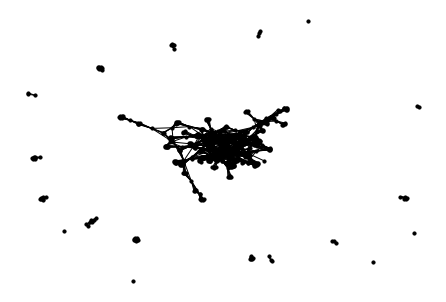

In [68]:
options = {'node_color': 'black',  
           'node_size': 10,
           'width': 1,}
nx.draw_spring(actors_network, **options)

In [70]:
Gc = max(nx.connected_component_subgraphs(actors_network), key=len)

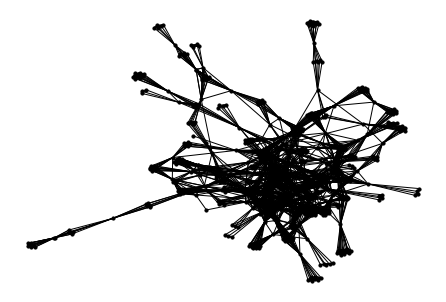

In [71]:
nx.draw_spring(Gc, **options)

In [26]:
actors_network.number_of_nodes()

221

In [69]:
def list_all_actors():
    l = []
    end = 100
    for i, movie_id in enumerate(df['id'][:end], start = 0):
        try:
            cast = df.loc[df['id']==movie_id]['cast'].item()
            cast_objects = ast.literal_eval(cast)
            list_of_actors = get_actors(cast_objects)
            l = l + list_of_actors
        except:
            pass
    return l
def list_actors_in_multiple_movies():
    l = list_all_actors()
    cnt = Counter(mylist)
    return ([k for k, v in cnt.items() if v > 1])
    

0.0% done
5.0% done
10.0% done
15.0% done
20.0% done
25.0% done
30.0% done
35.0% done
40.0% done
45.0% done
50.0% done
55.00000000000001% done
60.0% done
65.0% done
70.0% done
75.0% done
80.0% done
85.0% done
90.0% done
95.0% done


In [52]:
cnt = Counter(mylist)
new_list = ([k for k, v in cnt.items() if v > 1])

In [55]:
len(mylist)

17331

In [56]:
len(new_list)

2777